# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [161]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [162]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('/users/hp/desktop/Ds-springboard/mini_project/hospital_admission/hospital_readmit/data/cms_hospital_readmissions.csv')


In [163]:
hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


In [164]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [165]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/hp/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [166]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


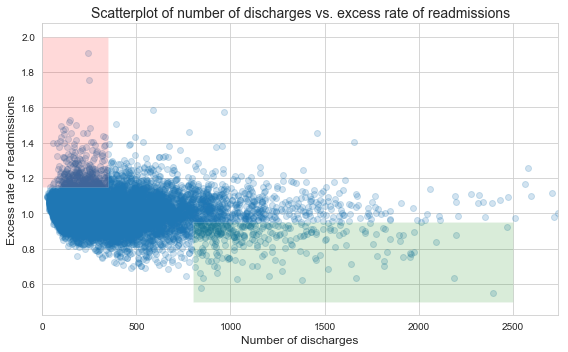

In [167]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Do you agree with the above analysis and recommendations? Why or why not?


**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges


In [168]:
# calculate Pearson correlation coefficients between x and y
np.corrcoef(x,y)

array([[ 1.        , -0.09309554],
       [-0.09309554,  1.        ]])

Correlation coefficient is negative and nearly zero which means rate of readmissions and number of discharges are not linearly correlated.

In [169]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [170]:
# dataframe of discharge vs readmission
df=pd.DataFrame({'discharge':x,'readmission':y})

In [171]:
# statsmodels works nicely with pandas dataframes
m = ols('readmission ~ discharge',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            readmission   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.50e-23
Time:                        21:53:19   Log-Likelihood:                 11177.
No. Observations:               11494   AIC:                        -2.235e+04
Df Residuals:                   11492   BIC:                        -2.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0179      0.001    757.349      0.0

In [172]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            readmission   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.50e-23
Time:                        21:53:19   Log-Likelihood:                 11177.
No. Observations:               11494   AIC:                        -2.235e+04
Df Residuals:                   11492   BIC:                        -2.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0179      0.001    757.349      0.000       1.015       1.021
discharge  -2.857e-05   2.85e-06    -10.023      0.000   -3.42e-05    -2.3e-05
==============================================================================
Omnibus:                     1666.001   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6855.329
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       6.538   Cond. No.                         743.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ Overall, rate of readmissions is trending down with increasing number of discharges
    Pearson correlation coefficient is negative and close to zero which means nearly no linear correlation between number of discharges and rate of readmissions
    Also, linear regression r2 value is 0.009 which also indicates there is no correlation between number of discharges and rate of readmission

**A. Initial observations based on the plot above**
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)


In [173]:
# dataframe of discharge vs readmission
df=pd.DataFrame({'discharge':x,'readmission':y})

In [174]:
# lower number of discharges (less than 350)
d1 = len(df[df.discharge <=350])
print('Number of cases with lower number of discharges:', d1)

# in shaded red area
r1 = len(df[df.discharge <=350][df.readmission>=1.15])
print('Number of cases in red shaded area:', r1)

print('Percent of excess rate of readmissions: ', r1/d1*100)


Number of cases with lower number of discharges: 7009
Number of cases in red shaded area: 351
Percent of excess rate of readmissions:  5.0078470537879864


/Users/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Only about 5% of excess rate of readmission (red area shaded) are in the lower part of discharges area (<350).

**A. Initial observations based on the plot above**
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 


In [175]:
# higer number of discharges (greater than 800)
d2 = len(df[df.discharge >= 800])
print('Number of cases with higher number of discharges:', d2)

r2 = len(df[df.discharge >= 800][df.readmission <= 0.95])
print('Number of cases in green shaded area:', r2)

print('Percent of excess rate of readmissions: ', r2/d2*100)


Number of cases with higher number of discharges: 900
Number of cases in green shaded area: 301
Percent of excess rate of readmissions:  33.44444444444444


/Users/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Only about 33% excess rate of readmission (green area shaded) is in the higher part of discharges.

**B. Statistics

+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.


In [176]:
# Hospitals with number of discharges < 100
df1 = df[df.discharge < 100]
print('Mean excess readmission rate: %.3f'% df1.readmission.mean())
print('Excess readmission rate greater than 1: %.0f' % (((len(df1[df1.readmission > 1]))/(len(df1)))*100) + '%')

Mean excess readmission rate: 1.023
Excess readmission rate greater than 1: 63%


+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.

    Ans: It is correct.

**B. Statistics

+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.


In [177]:
# hospitals with number of discharges > 1000
df2 = df[df.discharge > 1000]
print('Mean excess readadmission rate: %.3f' % df2.readmission.mean())
print('excess readmission rate greater than 1: %.0f' % (len(df2[df2.readmission > 1])/len(df2)*100) + '%' )


Mean excess readadmission rate: 0.979
excess readmission rate greater than 1: 45%


+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

    Ans: It is correct

**C. Conclusions

+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

    Ans: It is not. Pearson correlation coefficient is negative and close to zero which means nearly no linear correlation between number of discharges and rate of readmissions
    Also, linear regression r2 value is 0.009 which also indicates there is no correlation between number of discharges and rate of readmission
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions. 

    Ans: This may be true. Range of excess rate of readmissions is high particularly when number of discharges<350.In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.


**D. Regulatory policy recommendations

+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

    Ans: Yes, I agree. It is better to keep the range for the definition of small hospital (like <100)

+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

    Ans: No, I don't.


#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

+ Setup an appropriate hypothesis test.
+ Compute and report the observed significance value (or p-value).
+ Report statistical significance for $\alpha$ = .01.
+ Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
+ Look at the scatterplot above.
    + What are the advantages and disadvantages of using this plot to convey information?
    + Construct another plot that conveys the same information in a more direct manner.


Set r be the correlation between Number of discharges (x) vs Excess rate of readmissions (y). 
Null hypothesis: r = 0 (it means there is no relation between x and y) 
Alternative Hypothesis: r $\neq$ 0 
Statistical significance for $\alpha$ = 0.01


## Correlation between Number of discharges (x) vs Excess rate of readmissions (y)¶

In [178]:
from scipy import stats
r, p1_val = stats.pearsonr(x, y)
alpha = 0.01

print('correlation coefficient:', r)
print('p value =',p1_val)

if p1_val < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')


correlation coefficient: -0.09309554287590441
p value = 1.5022756426464526e-23
Ho can be rejected


p-value is 1.50 e-23 which is less than significant level of 0.01. Therefore, there is no significant correlations between number of discharges and excess rate of readmission with 99% confidence.


## Readmission rates on lower number of discharges hospitals (< 100) vs higher number of discharges hospitals (>1000)¶

Null hypothesis: There is no difference in distribution of mean rate readmission between lower(<100) and higher number of discharges(>1000) hosptial

Alternate hypothesis: there is a difference between distribution of mean rate readmission between lower and higher number of discharges hosptial

Statistical significance for $\alpha$ = 0.01



In [179]:
lower = df[(df['discharge']<100)&(df['readmission']>1)]
higher = df[(df['discharge']>1000)&(df['readmission']>1)]

In [180]:
lower_mean = lower.readmission.mean()
lower_std = lower.readmission.std()

higher_mean = higher.readmission.mean()
higher_std = higher.readmission.std()
print("lower_mean: "+ str(lower_mean))
print("higher_mean: "+ str(higher_mean))

lower_mean: 1.0524241011984015
higher_mean: 1.0786843902439023


In [181]:
#check for normal distribution
stats.normaltest(lower.readmission)

NormaltestResult(statistic=632.7258816856505, pvalue=4.0301435285653915e-138)

In [182]:
#check for normal distribution
stats.normaltest(higher.readmission)


NormaltestResult(statistic=96.09724975400025, pvalue=1.3575234890920782e-21)

In [183]:
# Run a two-sample t-test on the data.

from scipy.stats import ttest_ind

stat, p = ttest_ind(lower.readmission, higher.readmission)
print('t=%.3f, p=%.25f' % (stat, p))


t=-6.028, p=0.0000000023719930510373187


The p-value is 2.372e-09. This is less than statistical significance of  𝛼  = 0.01. Therefore,we can reject the null hypothesis which suggests there is a significant difference in readmission rate between high and low discharge hospitals.


### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Practical significance:

There is no relation between number of discharges (x) and excess rate of readmission (y) based on Pearson correlation coefficient.
The mean rate readmission for higher discharge hospital is smaller than lower discharge hospital.

Statistical significance:

It indicates a significant relation between x and y by computing p-value.
There is a big difference from two approaches. It leads to change the recommendation to the client. 
I think we have statistical significance but not practical significance in this case because of the effect size (For a large sample size, even tiny deviations from the null hypothesis will be significant)



## Look at the scatterplot above.¶
What are the advantages and disadvantages of using this plot to convey information?

Advantages:

Clearly shows excess rate of readmission in low (red area) and high discharges (green area) part. 
Disadvantages:

The trend between number of discharges and excess rate of readmissions is not clearly shown (no 'correlation coefficient')


Construct another plot that conveys the same information in a more direct manner.


/Users/hp/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


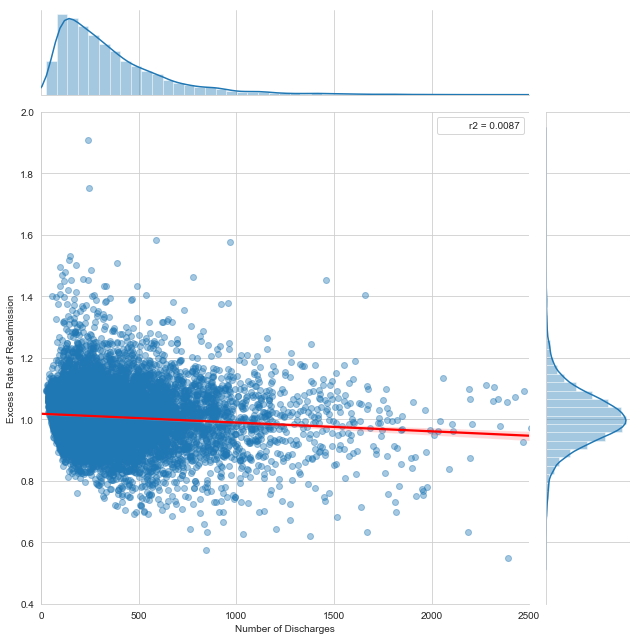

In [184]:
import seaborn as sns
def r2(discharge, readmission):
    return stats.pearsonr(discharge, readmission)[0] ** 2
sns.jointplot('discharge', 'readmission', data=df, stat_func=r2, kind='reg', height=9, 
              xlim=(0,2500), ylim=(0.4,2.0), joint_kws={'line_kws':{'color':'red'}}, scatter_kws={'alpha': 0.4})
plt.xlabel("Number of Discharges")
plt.ylabel("Excess Rate of Readmission")
plt.show()
